In [1]:
!git clone https://github.com/Dhanuja-Kavindra/deeplog.git

Cloning into 'deeplog'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 153 (delta 20), reused 19 (delta 9), pack-reused 106 (from 1)
Receiving objects: 100% (153/153), 24.34 MiB | 16.91 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [2]:
import sys
sys.path.append('/content/deeplog')

In [3]:
!pip install -r /content/deeplog/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.6 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# special to google colab | put your 4 Datasets into this path
folder_path = '/content/drive/My Drive/DeepLog/BGL'

Mounted at /content/drive


In [5]:
%cd /content/deeplog/example

/content/deeplog/example


In [9]:
!python bgl-preprocess.py

[2025-01-28 10:46:36,955][INFO]: Parsing file: /content/drive/My Drive/DeepLog/BGL/bgl_abnormal.log
[2025-01-28 10:46:37,432][INFO]: Loaded 2.9% of log lines.
[2025-01-28 10:46:37,539][INFO]: Loaded 5.7% of log lines.
[2025-01-28 10:46:37,645][INFO]: Loaded 8.6% of log lines.
[2025-01-28 10:46:37,751][INFO]: Loaded 11.5% of log lines.
[2025-01-28 10:46:37,859][INFO]: Loaded 14.3% of log lines.
[2025-01-28 10:46:37,963][INFO]: Loaded 17.2% of log lines.
[2025-01-28 10:46:38,071][INFO]: Loaded 20.1% of log lines.
[2025-01-28 10:46:38,233][INFO]: Loaded 22.9% of log lines.
[2025-01-28 10:46:38,337][INFO]: Loaded 25.8% of log lines.
[2025-01-28 10:46:38,445][INFO]: Loaded 28.7% of log lines.
[2025-01-28 10:46:38,549][INFO]: Loaded 31.5% of log lines.
[2025-01-28 10:46:38,653][INFO]: Loaded 34.4% of log lines.
[2025-01-28 10:46:38,754][INFO]: Loaded 37.3% of log lines.
[2025-01-28 10:46:38,861][INFO]: Loaded 40.1% of log lines.
[2025-01-28 10:46:38,966][INFO]: Loaded 43.0% of log lines.
[20

In [10]:
import pandas as pd

output_dir = './bgl_result'
df = pd.read_csv(f'{output_dir}/bgl_normal1.log_structured.csv')

In [11]:
df['EventId'].unique().shape

(156,)

In [12]:
!python train.py --num-class 156 --num-candidates 15 --epochs 35 --window-size 3 --local True

Distributed training - False
[2025-01-28 10:55:29,602][DEBUG]: Distributed training - False
Number of gpus requested - 0, available - 1.
[2025-01-28 10:55:29,617][DEBUG]: Number of gpus requested - 0, available - 1.
Get train data loader
[2025-01-28 10:55:29,617][INFO]: Get train data loader
Number of session(train): 2182869
[2025-01-28 10:55:30,543][INFO]: Number of session(train): 2182869
Number of seqs(train): 2182869
[2025-01-28 10:55:30,543][INFO]: Number of seqs(train): 2182869
Processes 2182869/2182869 (100%) of train data
[2025-01-28 10:55:31,720][DEBUG]: Processes 2182869/2182869 (100%) of train data
Epoch [1/35], Train_loss: 0.0031
[2025-01-28 10:57:54,305][DEBUG]: Epoch [1/35], Train_loss: 0.0031
Epoch [2/35], Train_loss: 0.0017
[2025-01-28 11:00:09,315][DEBUG]: Epoch [2/35], Train_loss: 0.0017
Epoch [3/35], Train_loss: 0.0015
[2025-01-28 11:02:25,968][DEBUG]: Epoch [3/35], Train_loss: 0.0015
Epoch [4/35], Train_loss: 0.0013
[2025-01-28 11:04:42,602][DEBUG]: Epoch [4/35], Tr

In [13]:
!python predict.py --threshold 25

Streaming output truncated to the last 5000 lines.
[2025-01-28 12:47:44,316][DEBUG]: 1
3
[2025-01-28 12:47:44,316][DEBUG]: 3
Current device: cuda
[2025-01-28 12:47:44,316][INFO]: Current device: cuda
Deserializing the input data.
[2025-01-28 12:47:44,316][INFO]: Deserializing the input data.
Predict next template on this pattern series.
[2025-01-28 12:47:44,316][INFO]: Predict next template on this pattern series.
[]
[2025-01-28 12:47:44,316][INFO]: []
15
[2025-01-28 12:47:44,316][DEBUG]: 15
1
[2025-01-28 12:47:44,316][DEBUG]: 1
3
[2025-01-28 12:47:44,317][DEBUG]: 3
Current device: cuda
[2025-01-28 12:47:44,317][INFO]: Current device: cuda
Deserializing the input data.
[2025-01-28 12:47:44,317][INFO]: Deserializing the input data.
Predict next template on this pattern series.
[2025-01-28 12:47:44,317][INFO]: Predict next template on this pattern series.
[]
[2025-01-28 12:47:44,317][INFO]: []
15
[2025-01-28 12:47:44,317][DEBUG]: 15
1
[2025-01-28 12:47:44,317][DEBUG]: 1
3
[2025-01-28 12:

# Visualization

Confusion Matrix

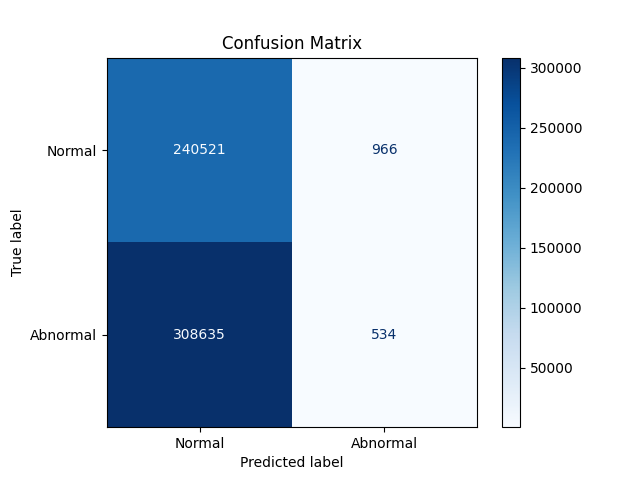

In [14]:
from IPython.display import Image, display
display(Image("confusion_matrix.png"))


ROC Curve

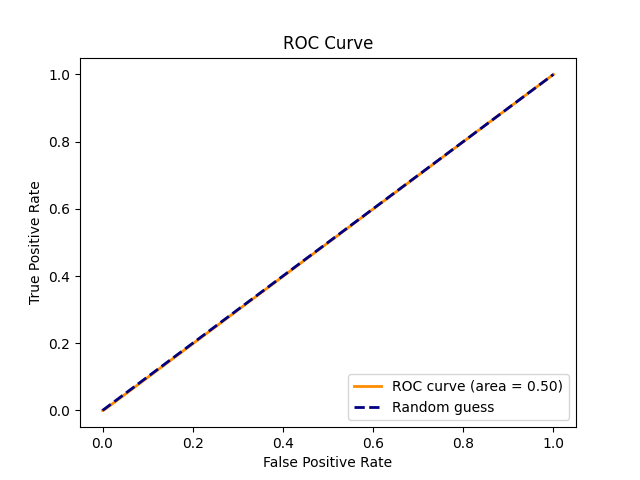

In [15]:
from IPython.display import Image, display
display(Image("roc_curve.png"))



Metric vs Threshold

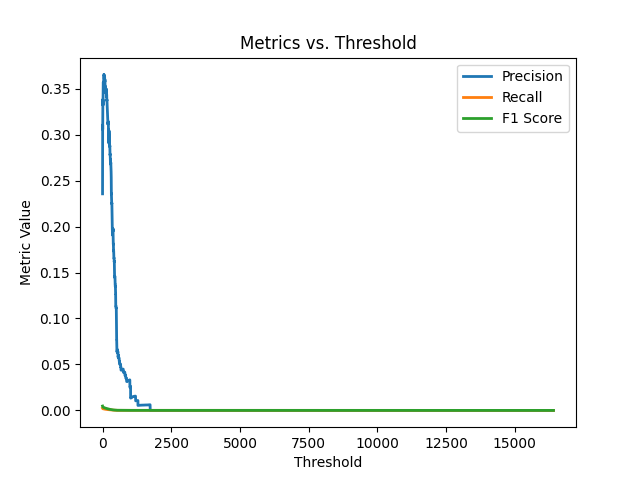

In [16]:
from IPython.display import Image, display
display(Image("metrics_vs_threshold.png"))